In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Numerical Quadrature



We will check all the numerical quadrature methods for the following integral:
$$
\int_{0}^{1} x^2 dx = \frac{1}{3}
$$

In [2]:
def f (x):
	return x**2

I_exact = 1/3

print("Exact value of the integral: ", I_exact)

Exact value of the integral:  0.3333333333333333


### Midpoint rule

Recall that the simple midpoint formula is an open Newton-Cotes formula that approximates the integral of $f$ over $[a,b]$ as
$$
\int_{a}^{b} f(x) d x \approx (b-a) f \left(\frac{a+b}{2}\right).
$$
We divide the interval $[a,b]$ into $N$ subintervals $T_j:=[x_j,x_{j+1}],\ j=0,\ldots,N-1$ of width $H=\frac{b-a}{N}$ with endpoints $x_j=a+jH,\ j=0,\ldots, N$. 
Applying the midpoint formula to each subinterval, we obtain the corresponding composite formula 
$$	
\int_{a}^{b} f(x) d x = \sum_{j=0}^{N-1} \int_{T_j} f(x) d x \approx H \sum_{j=0}^{N-1} f(\bar x_j),
$$where $\bar x_j:=\frac{x_j+x_{j+1}}{2}$ is the midpoint of the subinterval $T_j$.
Since we only want to use the quadrature nodes $\bar x_j$ and the corresponding values of the integrand function, we observe that, in the case of equally spaced nodes, $H$ coincides with the distance between any two consecutive nodes.


In [3]:
def rect(grid,f):
	'''
	Quadrature by composite rectangles method
	'''

	h = grid[1]-grid[0]
	x = np.array([grid[i]+h/2 for i in range(len(grid)-1)])
	y = f(x)
	return h*np.sum(y)

In [4]:
n = 100

grid = np.linspace(0,1,n)
# grid = np.random.rand(n)
I_rect = rect(grid,f)

print(I_rect)

0.33332483079957836


### Trapezoidal rule

We divide the interval $[a,b]$ into $N$ subintervals $T_j=[x_j,x_{j+1}]$ of width $H=\frac{b-a}{N}$, where $x_j=a+jH,\ j=0,\ldots,N$; by linearity we can write
$$
	\int_{a}^{b} f(x) \, dx = \sum_{j=0}^{N-1} \int_{x_j}^{x_{j+1}} f(x) \, dx.
$$
Approximating each term using the simple trapezoidal formula:
$$
	\int_{x_j}^{x_{j+1}} f(x) \, dx \approx \frac{H}{2} \left[ f(x_j)+ f(x_{j+1}) \right], 
$$
we obtain 
$$
	\int_{a}^{b} f(x) \, dx \approx \frac{H}{2} \sum_{j=0}^{N-1}\left[ f(x_j)+ f(x_{j+1})\right]
$$
and rearranging the sum we obtain the composite trapezoidal formula:
$$
	\int_{a}^{b} f(x) \, dx \approx \frac{H}{2}\left[ f(a) + 2 \sum_{j=1}^{N-1} f(x_j) + f(b) \right],
$$

In [5]:
def trap(grid,f):
	'''
	Quadrature by composite trapezoids method
	'''
	
	h = grid[1]-grid[0]
	x = np.array(grid)
	y = f(x)
	return h*(0.5*y[0]+np.sum(y[1:-1])+0.5*y[-1])

In [6]:
I_trap = trap(grid,f)
print(I_trap)

0.33335033840084355


### Simpson's 1/3 rule

Proceeding as for the composite trapezoidal formula, we obtain the composite Cavalieri-Simpson formula by applying the simple Cavalieri-Simpson formula on $N$ subintervals $T_j=[x_j,x_{j+1}]$ of $[a,b]$ of width $H=\frac{b-a}{N}$ with endpoints $x_j=a+jH,\ j=0,\ldots,N$:
$$
	\int_{a}^{b} f(x) \, dx \approx \frac{H}{6} \left[ f(a) + 2 \sum_{j=1}^{N-1} f(x_j) + 4 \sum_{j=0}^{N-1} f\left( x_j +\frac{H}{2}\right) + f(b) \right]
$$

In [7]:
def simp(grid,f):
	'''
	Quadrature by composite Simpson's method
	'''
	h = grid[1]-grid[0]

	y = f(grid)
	y2 = f(grid[:-1]+h/2)
	
	Q = y[0]+y[-1]
	Q += 2*np.sum(y[1:-1])
	Q += 4*np.sum(y2)
		
	return h/6*Q

In [8]:
I_simp = simp(grid,f)

print("Exact value of the integral: ", I_exact)
print("Rectangles method: ", I_rect, "	Error: ", abs(I_rect-I_exact))
print("Trapezoids method: ", I_trap, "	Error: ", abs(I_trap-I_exact))
print("Simpson's method : ", I_simp, "		Error: ", abs(I_simp-I_exact))


Exact value of the integral:  0.3333333333333333
Rectangles method:  0.33332483079957836 	Error:  8.50253375495047e-06
Trapezoids method:  0.33335033840084355 	Error:  1.7005067510234007e-05
Simpson's method :  0.3333333333333335 		Error:  1.6653345369377348e-16



## Error estimates

### Composite midpoint rule
$$
\left\vert \tilde{R}_0^{\mathsf{C}}\right\vert \leq \frac{1}{24}\frac{(b-a)^3}{N^2} \left\Vert f''\right\Vert_\infty.
$$

To obtain a tolerance $\varepsilon$ we need to choose $N$ such that 
$$
N \geq \sqrt{\frac{1}{24}\frac{(b-a)^3}{\varepsilon} \left\Vert f''\right\Vert_\infty} .
$$

### Composite trapezoidal rule
$$
\left\vert \tilde{R}_1^{\mathsf{C}}\right\vert \leq \frac{1}{12}\frac{(b-a)^3}{N^2} \left\Vert f''\right\Vert_\infty.
$$

To obtain a tolerance $\varepsilon$ we need to choose $N$ such that 
$$
N \geq \sqrt{\frac{1}{12}\frac{(b-a)^3}{\varepsilon} \left\Vert f''\right\Vert_\infty} .
$$

### Composite Simpson's rule
$$
\left\vert \tilde{R}_2^{\mathsf{C}}\right\vert \leq \frac{1}{2880}\frac{(b-a)^5}{N^4} \left\Vert f^{(4)}\right\Vert_\infty.
$$
To obtain a tolerance $\varepsilon$ we need to choose $N$ such that 
$$
N \geq \sqrt[4]{\frac{1}{2880}\frac{(b-a)^5}{\varepsilon} \left\Vert f^{(4)}\right\Vert_\infty} .
$$

## Example

Let us consider the function integral 
$$
I = \int_0^{\pi/2} \sin^2(x) dx = \frac{\pi}{4} \approx 0.7853981633974483
$$

In [9]:
import sympy as sym

x = sym.symbols('x')
f = sym.sin(x)**2

f_num = lambda X : sym.lambdify(x,f)(X)

I_exact = np.pi/4

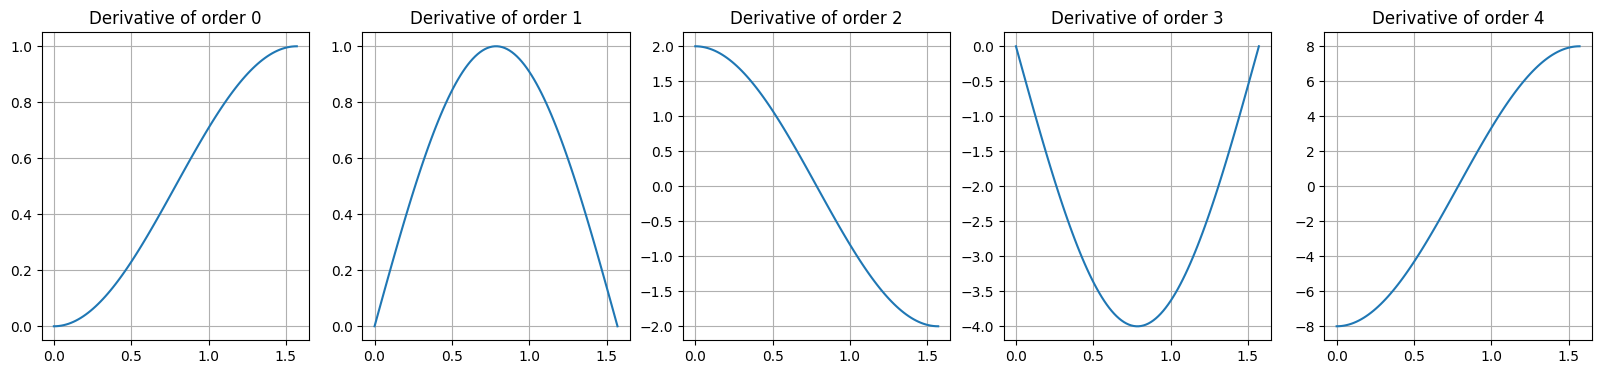

In [10]:

fig, axs = plt.subplots(1,5,figsize=(20,4))
X = np.linspace(0, np.pi/2, 100)

for index, ax in enumerate(axs):
	ax.plot(X, sym.lambdify(x, sym.diff(f, x, index))(X))
	ax.set_title('Derivative of order '+str(index))
	ax.grid()

plt.show()


Looking at the plots we can estimate the infinity norms of the derivatives and therefore the number of nodes needed to reach a certain tolerance. Let us set $\varepsilon = 10^{-6}$.

In [11]:
N_rect = lambda tol : np.ceil(np.sqrt(1/24 * (np.pi/2)**3 * 1/tol * 2))
N_trap = lambda tol : np.ceil(np.sqrt(1/12 * (np.pi/2)**3 * 1/tol * 2))
N_simp = lambda tol : np.ceil((1/2880 * (np.pi/2)**5 * 1/tol * 8)**(1/4))


tolerances = [1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
N_values = {
	'Tolerance': tolerances,
	'N_rect': [N_rect(tol) for tol in tolerances],
	'N_trap': [N_trap(tol) for tol in tolerances],
	'N_simp': [N_simp(tol) for tol in tolerances]
}

import pandas as pd
N_df = pd.DataFrame(N_values)
N_df

,Tolerance,N_rect,N_trap,N_simp
0,1.000000e-06,569.0,804.0,13.0
1,1.000000e-07,1798.0,2542.0,23.0
2,1.000000e-08,5684.0,8038.0,41.0
3,1.000000e-09,17972.0,25416.0,72.0
4,1.000000e-10,56832.0,80372.0,128.0


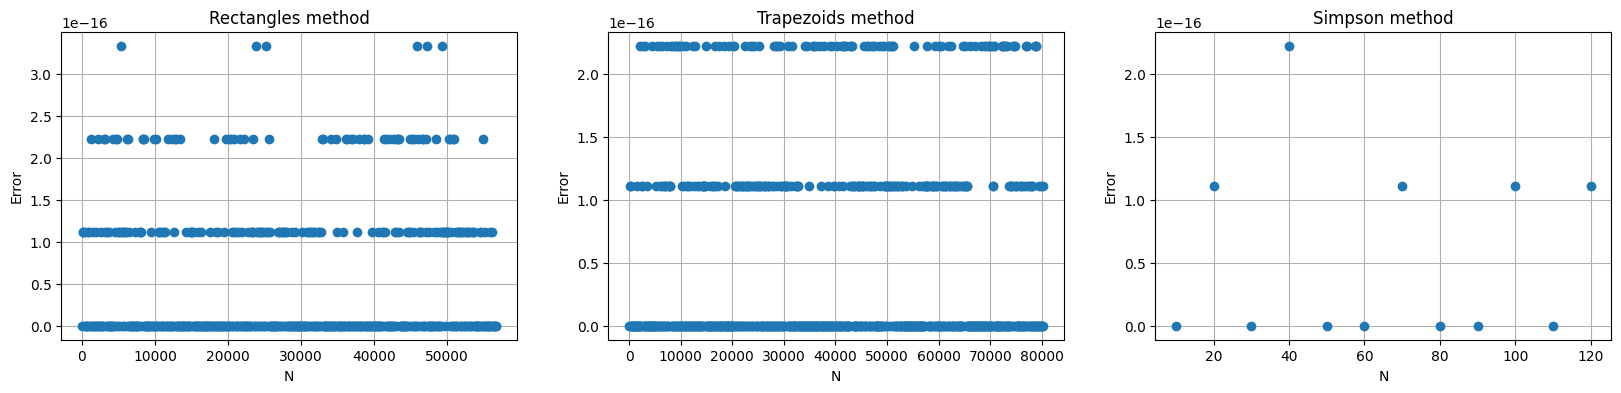

In [12]:
errs_rect = []
for n in range(10,56832,100):
	grid = np.linspace(0,np.pi/2,n)
	I_rect = rect(grid,f_num)
	errs_rect.append(abs(I_rect-I_exact))

errs_trap = []
for n in range(10,80372,100):
	grid = np.linspace(0,np.pi/2,n)
	I_trap = trap(grid,f_num)
	errs_trap.append(abs(I_trap-I_exact))

errs_simp = []
for n in range(10,128,10):
	grid = np.linspace(0,np.pi/2,n)
	I_simp = simp(grid,f_num)
	errs_simp.append(abs(I_simp-I_exact))

fig, axs = plt.subplots(1,3,figsize=(20,4))
axs[0].plot(range(10,56832,100),errs_rect,'o')
axs[0].set_title('Rectangles method')
axs[0].set_xlabel('N')
axs[0].set_ylabel('Error')
axs[0].grid()

axs[1].plot(range(10,80372,100),errs_trap,'o')
axs[1].set_title('Trapezoids method')
axs[1].set_xlabel('N')
axs[1].set_ylabel('Error')
axs[1].grid()

axs[2].plot(range(10,128,10),errs_simp,'o')
axs[2].set_title('Simpson method')
axs[2].set_xlabel('N')
axs[2].set_ylabel('Error')
axs[2].grid()

plt.show()
